# DTR with CA Housing (Regression)

## Getting started
Import modules, mount Drive, read in the data, check data types and missing values. You may also do some light EDA prior to modeling.

Notice how we are using the same functions over and over again... it really is like following a recipe.


In [1]:
# import modules we need for EDA and wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# these functions are useful for splitting and normalization
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split

# import other functions we'll need for regression modeling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# regression error metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# # mount your google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# read in some data
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [3]:
# data type, shape and columns

print("This is the shape :\n", df.shape, '\n') # escape characters are fun! \n adds a return line
print("These are the column names: \n", df.columns, '\n') # helps keep things nice and clean
print("These are the data types: \n", df.dtypes)

# right away you see this 'valid' column is an 'object', which means it's a string
# AKA something you can't do math on... look at the head and see what's going on
# in that column. ALL OTHER DATA IS NUMERIC (float64)
# this is a good quiz question... ;)

print("\nThis is the head:") # see how I can pop that \n anywhere?
df.head()   # also note how much stuff I have pasted in ONE CELL...
            # now you are cooking with gas!

# the head confirms to use that the valid column is some type of time/date stamp
# we need to stop what we are doing and take care of this NOW!

This is the shape :
 (17000, 9) 

These are the column names: 
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object') 

These are the data types: 
 longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

This is the head:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
# here's another cool way to get a lot of this info AND MORE
df.info() # gives you missing values report too - this is nice complete data

# data types, shape, missing values per columm.... pandas rocks...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


## Data splitting
Subset your data into X features and Y target variable for modeling. Convert X and Y to numpy arrays. Then use train_test_split for data splitting (80/20 is very common); don't forget random seed and shuffle.

In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [6]:
# the target variable is Y
# we know that this is 'medv'
Y = df['median_house_value']
print(Y.shape) # a single column with 506 rows

(17000,)


In [7]:
# everything else is X
# so just drop 'medv' and you are done
X = df.drop('median_house_value', axis=1)
print(X.shape) # note that we have gone from 14 to 13 columns, this is good! 506 rows.

(17000, 8)


In [8]:
# now, split the data in ONE LINE OF CODE
# notice how we are assigning four different variables at once
# this makes it really clean

# be careful of capital vs. lowercase X and Y, you might get an error...
# notice the 80/20 split we perform

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 42)

In [9]:
# check your work - does the shape match what you think it should be?
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13600, 8) (3400, 8) (13600,) (3400,)


In [10]:
# # convert these all to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Min/Max Scaling
This will ensure all of your X data is between 0 (min) and 1 (max). You will use fit_transform() on the train data first, then fit on the test data. If you don't do this step after splitting, you will have data leakage.

Only scale the X data, not the Y data!

Do yourself a favor and just overwrite X_train and X_test when standardizing, as I do below. Min/max scaling requires that the data are numpy arrays and all numeric data.


**Like this example:**
```
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
```


In [11]:
# you probably have already imported the MinMaxScale at the top of your script
# you should convert to numpy array before scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# if you wanted to run summary stats on these to check the range,
# you would need to convert to a pandas dataframe.
tmp = pd.DataFrame(X_train)
tmp.describe() # notice how all the max values are 1, all min values are 0.

,0,1,2,3,4,5,6,7
count,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000
mean,0.482551,0.327069,0.542284,0.069519,0.083567,0.040048,0.082229,0.232760
std,0.203859,0.226774,0.247018,0.057161,0.065365,0.032523,0.063121,0.131696
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.255341,0.147715,0.333333,0.038381,0.045779,0.022002,0.046045,0.142507
50%,0.592065,0.181722,0.549020,0.055964,0.067349,0.032792,0.067259,0.209383
75%,0.640895,0.549416,0.705882,0.083122,0.100403,0.048292,0.099326,0.293106
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Fit The Model
Fit the model and make new variables to save your train and test predictions. Make sure you are using the appropriate regression or classification model.

Notice how we're using the same training data and test data for each model - this is critical!

Also note that in many StackOverflow examples, folks don't use 'DTR' or 'LR' as variable names for their models - instead, they often use 'clf' which stands for classifier. Helps you abstract what's going on.

### Linear Regression

In [13]:
# make a variable to store the general model
LR = LinearRegression()
# fit the model - one line of code
LR = LR.fit(X_train, y_train)

In [14]:
# store the predictions
train_preds_LR = LR.predict(X_train)
test_preds_LR = LR.predict(X_test)

### DTR

Check out the model documentation:

**DTR Model Documentation:** https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html


Some extra content to think about...

**Link:** https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

**Link:** https://scikit-learn.org/stable/modules/tree.html

In [18]:
# make a variable to store the general model
# you can accept all of the defaults...
DTR = DecisionTreeRegressor(min_samples_split=15)
# or start to 'tinker' :) this is called hyperparameter tuning
# DTR = DecisionTreeRegressor(min_samples_split=15) # make this bigger and the tree will shrink!

# fit the model - one line of code
DTR = DTR.fit(X_train, y_train)

In [19]:
# store the predictions
train_preds_DTR = DTR.predict(X_train)
test_preds_DTR = DTR.predict(X_test)

In [20]:
# show the tree
# link: https://www.datacamp.com/community/tutorials/decision-tree-classification-python
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(DTR, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# hard to see, but that's OK!
# we will learn about partial depenence
# and feature importance with is way easier to see than this

# for now, just appreciate how awesome this looks!
# double click and you can see

Output hidden; open in https://colab.research.google.com to view.

## Evaluate the Model
Look at the appropriate error metrics depending on the problem you are solving.

For a regression problem, look at the R2, MAE and MSE; then make a scatterplot of actual vs. predicted values with nice labels and titles.

For a classification problem, create the classification report (gives a confusion matrix and useful metrics in one line of code).

See how we are just tacking on a suffix like '_LR' or '_DTR' on the end of things? Keep your code clean and you can just copy paste. Same stuff as before, but we need to be organized since we are introducing more models.

### R2

In [21]:
# this is a regression problem, and there are three metrics to look at.
# 1) R2 value - for Linear Regression
print("This is train R2 (LR):", r2_score(y_train, train_preds_LR)) # train
print("This is test R2 (LR):", r2_score(y_test, test_preds_LR)) # test

# 1) R2 value - for Decision Tree Regression
print("This is train R2 (DTR):", r2_score(y_train, train_preds_DTR)) # train
print("This is test R2 (DTR):", r2_score(y_test, test_preds_DTR)) # test

This is train R2 (LR): 0.6352694644505288
This is test R2 (LR): 0.6636396350243803
This is train R2 (DTR): 0.9210650275860842
This is test R2 (DTR): 0.7144568477261855


### MAE

In [22]:
# 2) mae - for Linear Regression
trainMAE_LR = mean_absolute_error(y_train, train_preds_LR)
print("This is trainMAE (LR):", trainMAE_LR) # train
testMAE_LR = mean_absolute_error(y_test, test_preds_LR)
print("This is testMAE (LR):", testMAE_LR) # test

# 2) mae - for DT Regression
trainMAE_DTR = mean_absolute_error(y_train, train_preds_DTR)
print("This is trainMAE (DTR):", trainMAE_DTR) # train
testMAE_DTR = mean_absolute_error(y_test, test_preds_DTR)
print("This is testMAE (DTR):", testMAE_DTR) # test

This is trainMAE (LR): 51008.78488384543
This is testMAE (LR): 49983.47465122919
This is trainMAE (DTR): 20409.100219432934
This is testMAE (DTR): 40818.38273435715


### MSE
If you see an MSE of 0, this means a perfect prediction - this should NEVER happen... there should always be at least a little bit of error in your train results, otherwise you are OVERFITTING. You need to play with the hyperparameters (we will do this in future weeks).

In [23]:
# 3) mse
trainMSE_LR = mean_squared_error(y_train, train_preds_LR)
print("This is trainMSE (LR):", trainMSE_LR)
testMSE_LR = mean_squared_error(y_test, test_preds_LR)
print("This is testMSE (LR):", testMSE_LR)

# 3) mse
trainMSE_DTR = mean_squared_error(y_train, train_preds_DTR)
print("This is trainMSE (DTR):", trainMSE_DTR)
testMSE_DTR = mean_squared_error(y_test, test_preds_DTR)
print("This is testMSE (DTR):", testMSE_DTR)

This is trainMSE (LR): 4875656612.327819
This is testMSE (LR): 4634658406.223354
This is trainMSE (DTR): 1055189469.1625595
This is testMSE (DTR): 3934455746.952449


## LR predictions
This is a simpler model, and it has different error than the Decision Tree model!

In [24]:
Y.describe()

count     17000.000000
mean     207300.912353
std      115983.764387
min       14999.000000
25%      119400.000000
50%      180400.000000
75%      265000.000000
max      500001.000000
Name: median_house_value, dtype: float64

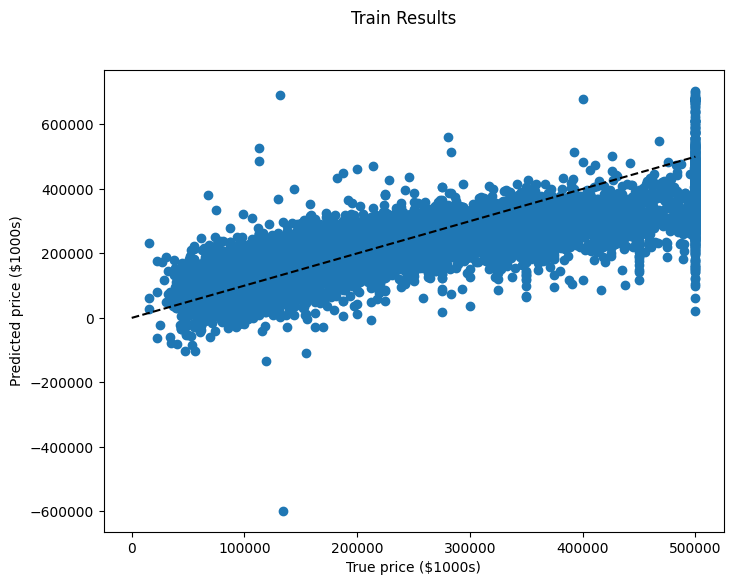

In [25]:
# a quick scatterplot for train results
# let's see how it fit
plt.figure(figsize=(8, 6))
plt.scatter(x=y_train, y=train_preds_LR)

plt.plot([0, 5E5], [0, 5E5], '--k') # 45 degree line
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.suptitle('Train Results')
plt.show()

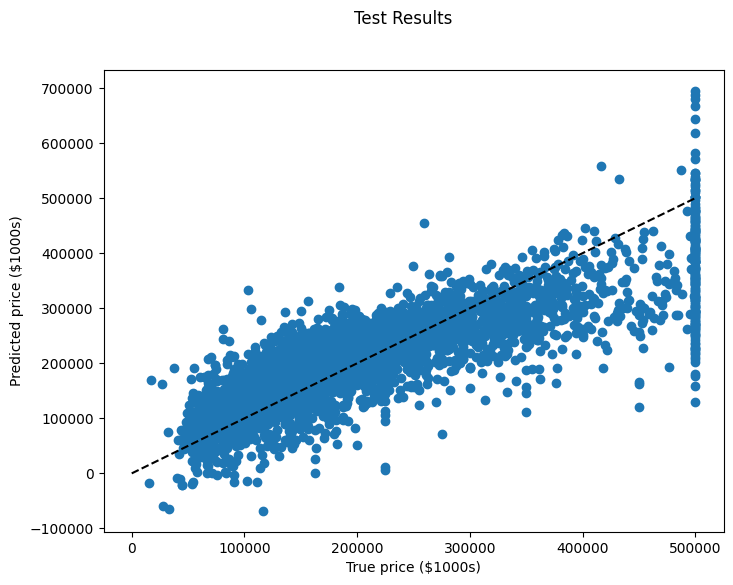

In [26]:
# a quick scatterplot for test results
# same code as above, just different labels
# a quick scatterplot for train results
# let's see how it fit
plt.figure(figsize=(8, 6))
plt.scatter(x=y_test, y=test_preds_LR)
plt.plot([0, 5E5], [0, 5E5], '--k') # 45 degree line
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.suptitle('Test Results')
plt.show()

## DTR Results
Look at how each has a different flavor...

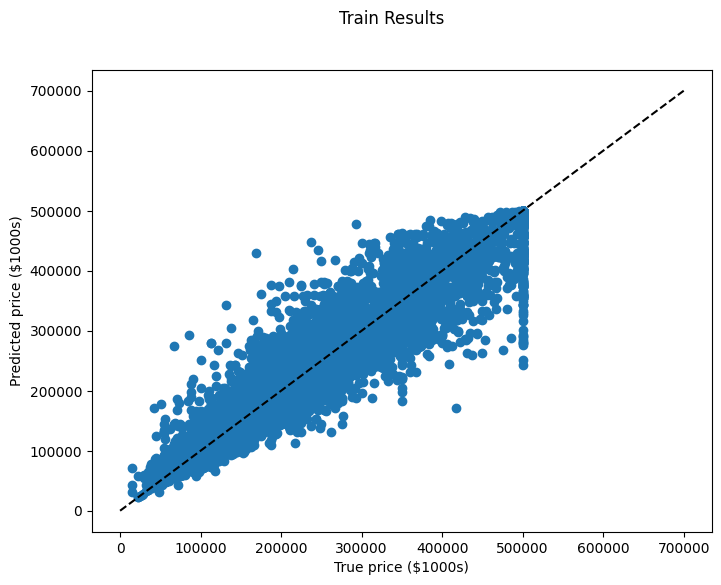

In [27]:
# a quick scatterplot for train results
# let's see how it fit
plt.figure(figsize=(8, 6))
plt.scatter(x=y_train, y=train_preds_DTR)
plt.plot([0, 7E5], [0, 7E5], '--k') # 45 degree line
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.suptitle('Train Results')
plt.show()

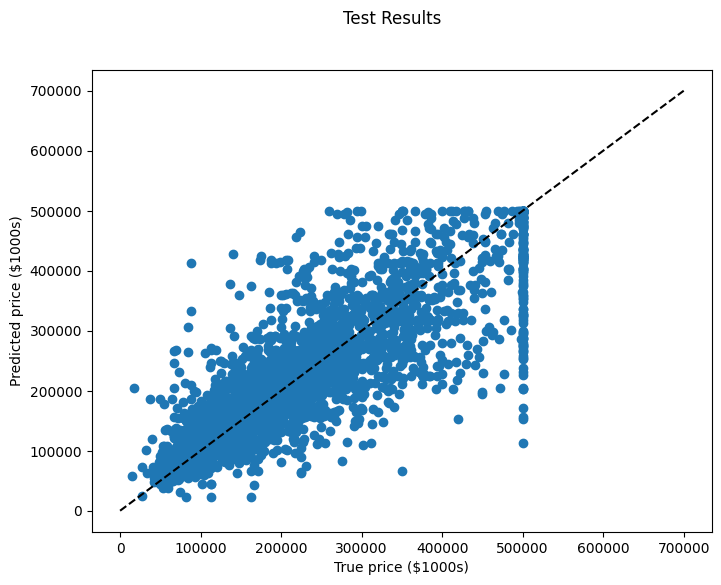

In [28]:
# a quick scatterplot for test results
# same code as above, just different labels
# a quick scatterplot for train results
# let's see how it fit
plt.figure(figsize=(8, 6))
plt.scatter(x=y_test, y=test_preds_DTR)
plt.plot([0, 7E5], [0, 7E5], '--k') # 45 degree line
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.suptitle('Test Results')
plt.show()

## Sub-Plots
Way cleaner! Try doing the plots side-by-side.

### LR Results

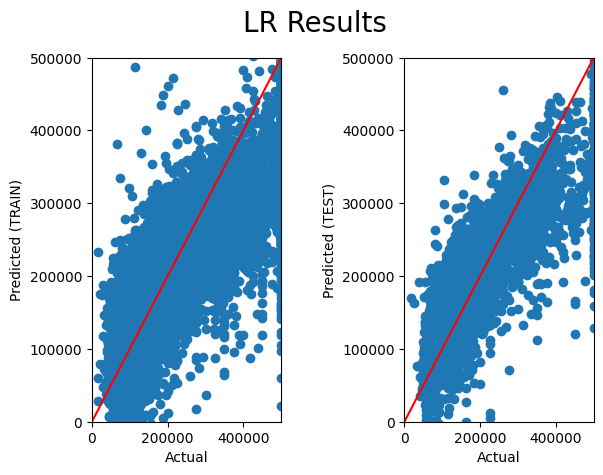

In [29]:
# specify the dimensions
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# fig limits


# add a main title across top
fig.suptitle("LR Results", fontsize=20)

# this makes the individual subplots
axes[0].scatter(x=y_train, y=train_preds_LR) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)
# set plot limits
axes[0].set_xlim(0,5E5)
axes[0].set_ylim(0,5E5)
# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')


axes[1].scatter(x=y_test, y=test_preds_LR) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted (TEST)",  fontsize=10)
# set plot limits
axes[1].set_xlim(0,5E5)
axes[1].set_ylim(0,5E5)
# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# scooch it down
# link: https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot
fig.subplots_adjust(top=0.88)

# show the plot
plt.show()

### DTR Results

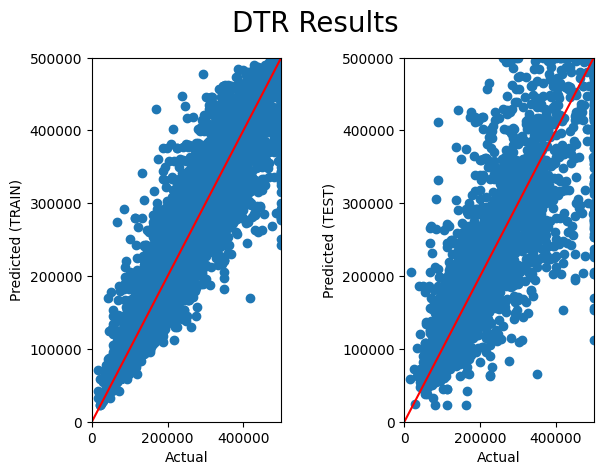

In [30]:
# specify the dimensions
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# fig limits


# add a main title across top
fig.suptitle("DTR Results", fontsize=20)

# this makes the individual subplots
axes[0].scatter(x=y_train, y=train_preds_DTR) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)
# set plot limits
axes[0].set_xlim(0,5E5)
axes[0].set_ylim(0,5E5)
# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')


axes[1].scatter(x=y_test, y=test_preds_DTR) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted (TEST)",  fontsize=10)
# set plot limits
axes[1].set_xlim(0,5E5)
axes[1].set_ylim(0,5E5)
# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# scooch it down
# link: https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot
fig.subplots_adjust(top=0.88)

# show the plot
plt.show()

# Done!
The DTR model overfits the training data a little bit, but we will let that be for now. If you want, try updating some of the hyperparameters so that you get a little more scatter along the 45 degree line. For a DTR, you may consider


*   min_samples_leaf
*   min_samples_split

For example, by making min_samples_leaf = 15, you force the terminal nodes/leafs to have 15 rows in them, instead of 1! This is much more robust.

Check slides and model documentation for other ideas!



# [Optional] Grid Search/Hyperparameter Tuning for DTR
We will cover this another week! You can review the documentation for the  [DecisionTreeRegressor()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) and look at all of the options available to you. This is how we can explore all of the hyperparameters to get a best fitting model (you would use this on training data, then apply to validation and test data.)

***Background: here is a list of the hyperparameters in sklearn for the DecisionTreeRegressor:***

**criterion:**`{“mse”, “friedman_mse”, “mae”, “poisson”}, default=”mse”`

The function to measure the quality of a split. Supported criteria are “mse” for the mean squared error, which is equal to variance reduction as feature selection criterion and minimizes the L2 loss using the mean of each terminal node, “friedman_mse”, which uses mean squared error with Friedman’s improvement score for potential splits, “mae” for the mean absolute error, which minimizes the L1 loss using the median of each terminal node, and “poisson” which uses reduction in Poisson deviance to find splits.


**max_depth:** `int, default=None`

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_split:** `int or float, default=2`

The minimum number of samples required to split an internal node

**min_samples_leaf:** `int or float, default=1`

The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

**max_leaf_nodes:** `int, default=None`
Grow a tree with `max_leaf_nodes` in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.



On your own, you may want to look at how we can prune the tree with more sophisticated methods such as [cost complexity](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html).

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

param_grid = {"criterion":  ["squared_error", "absolute_error"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

## Comment in order to publish in kaggle.

grid_cv_DTR = GridSearchCV(DTR, param_grid, cv=5)

grid_cv_DTR.fit(X_train,y_train)

print("R-Squared::{}".format(grid_cv_DTR.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_DTR.best_params_))

KeyboardInterrupt: ignored

... then you test your 'best' model on the test partition to see if you get the same result!